# **Hands On 3 - Dendograma**

Grupo 3 - John Wesley Santos Alencar, Fabio Cardoso, Luiz Felipe Menezes Barbosa, Rogério Fernandes

# Importando Biblioteca

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
import numpy as np

# Lendo a base de dados



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')

df = df.set_index('CustomerID')

df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [ ]:
#Trocando genero para booleano
df['Genre_bool'] = df['Genre'].apply(lambda x: 1 if x == "Male" else 0)
df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_bool
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0
6,Female,22,17,76,0
7,Female,35,18,6,0
8,Female,23,18,94,0
9,Male,64,19,3,1


# Plotando o df no eixo x e y


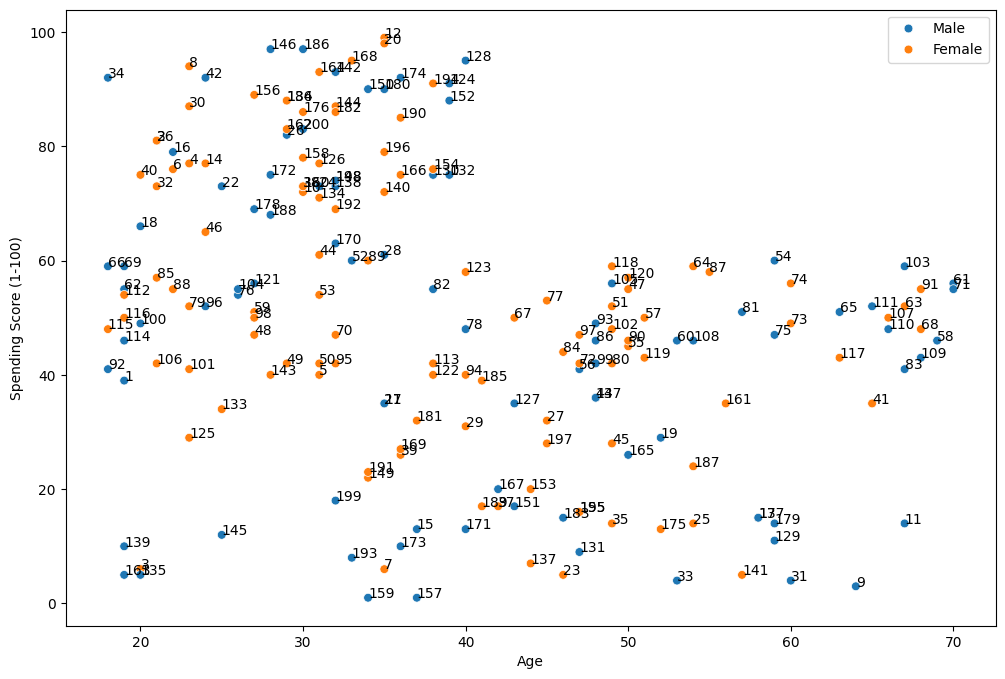

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(df,x='Age', y='Spending Score (1-100)', s=40,hue = 'Genre')
#ax.set_xlim(1, 12)
#ax.set_ylim(1, 10)

for i, txt in enumerate(df.index):
    ax.annotate(txt,(df.iloc[i]['Age'], df.iloc[i]['Spending Score (1-100)']))

plt.legend(bbox_to_anchor=(1, 1))


plt.show()

# Selecionando uma amostra aleatoriamente (Tamanho = 40)

In [ ]:
df_40 = df.sample(n=40)
print(df_40)

             Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                            
98          Female   27                  60                      50   
61            Male   70                  46                      56   
36          Female   21                  33                      81   
99            Male   48                  61                      42   
46          Female   24                  39                      65   
119         Female   51                  67                      43   
45          Female   49                  39                      28   
55          Female   50                  43                      45   
51          Female   49                  42                      52   
88          Female   22                  57                      55   
106         Female   21                  62                      42   
107         Female   66                  63                      50   
70    

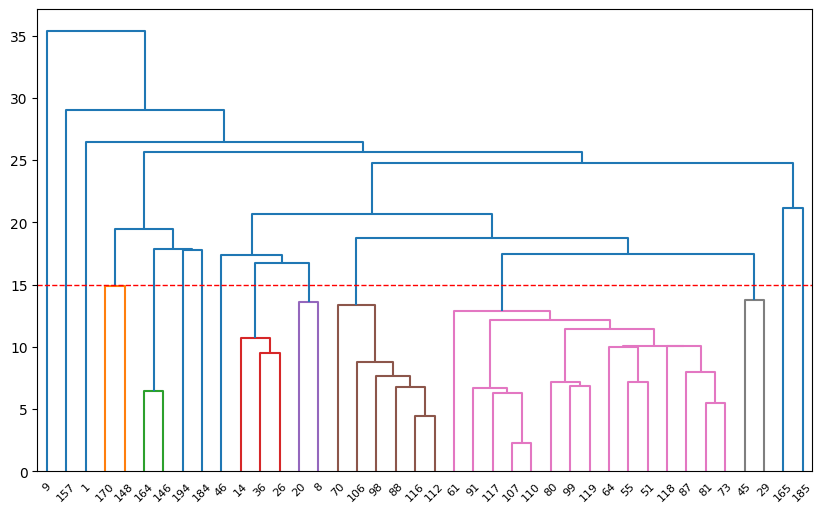

In [ ]:
# Metodo Simples

# Calculate the distance entre cada amostra
Z = single(df_40.drop(['Genre'], axis=1))
tr = 15
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(10, 6))
dendrogram(Z, color_threshold=tr, labels=df_40.index)
plt.axhline(y=tr, c='red', lw=1, linestyle='dashed')

# Show the graph
plt.show()

# Selecionando uma amostra aleatoriamente (Tamanho = 25)

In [ ]:
df_25 = df.sample(n=25)
print(df_25)

             Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                            
48          Female   27                  40                      47   
151           Male   43                  78                      17   
118         Female   49                  65                      59   
198           Male   32                 126                      74   
165           Male   50                  85                      26   
54            Male   59                  43                      60   
148         Female   32                  77                      74   
18            Male   20                  21                      66   
134         Female   31                  72                      71   
57          Female   51                  44                      50   
129           Male   59                  71                      11   
113         Female   38                  64                      42   
15    

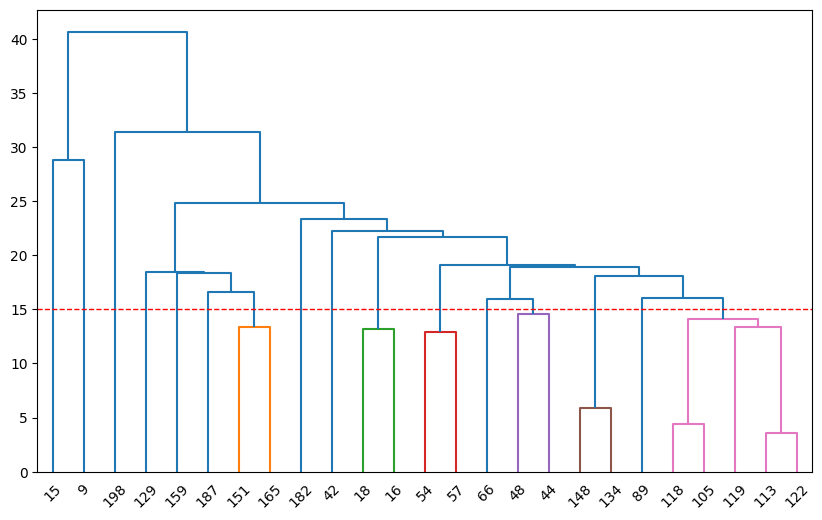

In [ ]:
# Metodo Simples

# Calculate the distance entre cada amostra
Z = single(df_25.drop(['Genre'], axis=1))
tr = 15
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(10, 6))
dendrogram(Z, color_threshold=tr, labels=df_25.index)
plt.axhline(y=tr, c='red', lw=1, linestyle='dashed')

# Show the graph
plt.show()

# Aplicando os cluster para 25

In [ ]:
labels = fcluster(Z, t=tr, criterion='distance')
df_25['cluster_id'] = labels
df_25

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_bool,cluster_id
CustomerID,,,,,,
48,Female,27,40,47,0,9
151,Male,43,78,17,1,3
118,Female,49,65,59,0,12
198,Male,32,126,74,1,16
165,Male,50,85,26,1,3
54,Male,59,43,60,1,8
148,Female,32,77,74,0,11
18,Male,20,21,66,1,7
134,Female,31,72,71,0,11


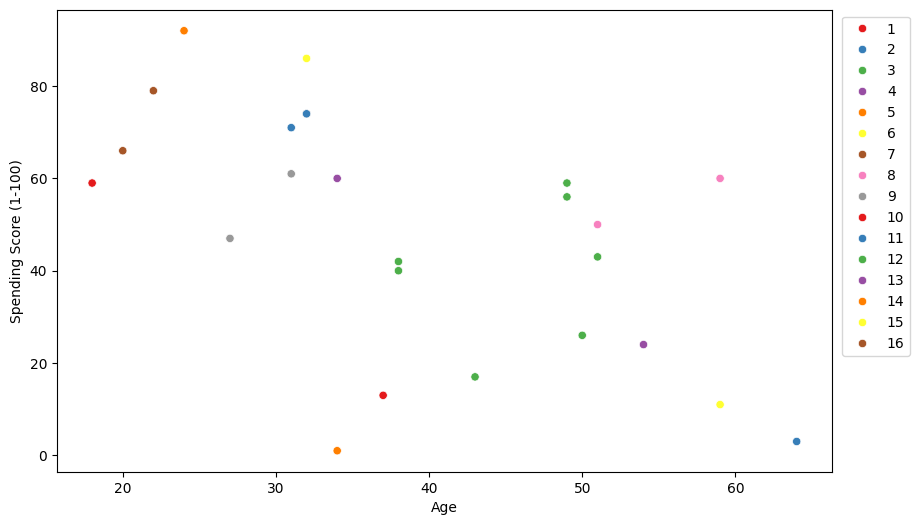

In [ ]:
#Visualizando os clusters

plt.figure(figsize=(10, 6))


sns.scatterplot(df_25, x='Age', y='Spending Score (1-100)', hue='cluster_id', palette='Set1')


# Annotate each point with its index
for i, txt in enumerate(df.index):
    ax.annotate(txt, (df.iloc[i]['Age'], df.iloc[i]['Spending Score (1-100)']), ha='left')
plt.legend(bbox_to_anchor=(1.11, 1))
plt.show()

##Cluster nº 01

In [ ]:
cluster_1 = df.loc[[142,136]]
cluster_1

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_bool
CustomerID,,,,,
142,Male,32,75,93,1
136,Female,29,73,88,0


Podemos observar no cluster 01 o agrupamento de duas pessoas com média de idade em 30,5; média de recebimento em 74k e a média da pontuação de gastos em 90,5.

Analisando os dados, percebemos que estes indivíduos recebem muito bem para a idade deles, mas que também há gastos bem elevados, inferindo que fazem parte de um grupo de desejo para qualquer companhia.

É necessário um maior detalhamento dos gastos para podermos localizar o ramo de empresas que se encaixariam como possíveis fornecedores.

Enxego esse cluster ideal para empresas de varejo online.

##Cluster nº 02

In [ ]:
cluster_2 = df.loc[[190,184]]
cluster_2

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_bool
CustomerID,,,,,
190,Female,36,103,85,0
184,Female,29,98,88,0


No cluster 02 podemos observar as mesmas características do cluster 01, com médias maiores nas idades e no recebimento, mas não na pontuação de gastos que ficou abaixo do cluster 01.

Percebemos que são pessoas com média de idade em 34 anos; média de recebimento em 100,5k e média da pontuação de gastos em 86,5.

Compreendo que esse agrupamento mostra duas pessoas ideiais para diversas empresas, porém necessita um maior detalhamento para localizarmos quais ramos dessas empresas, uma vez que não temos dados mais detalhados.

Entretanto, já há um nicho de companhias que vendem ou prestam serviços ao publico feminino, já que esse agurpamento é formado só por mulheres


##Cluster nº 03

In [ ]:
cluster_3 = df.loc[[69,116,104,79,48,59]]
cluster_3

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_bool
CustomerID,,,,,
69,Male,19,48,59,1
116,Female,19,65,50,0
104,Male,26,62,55,1
79,Female,23,54,52,0
48,Female,27,40,47,0
59,Female,27,46,51,0


É o agrupamento com o maior número de pessoas (6), formado por homens e mulheres com média de idade em 23,5 anos; média do recebimento anual em 52,5k e média de pontuação de gastos em 52,33.

Comparando esse agrupamento aos dois anteriores, percebemos que são pessoas mais novas com um recebimento anual de início de carreira e com uma pontuação de gastos equilibrada.

Para esse cluster indicaria empresas do ramo financeiro ou empresas imobiliarias, pois estão começando a vida profissional com uma tendência de gastos equilibrada, ideal para essas companhias.

##Cluster nº 04

In [ ]:
cluster_4 = df.loc[[73,58,61]]
cluster_4

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_bool
CustomerID,,,,,
73,Female,60,50,49,0
58,Male,69,44,46,1
61,Male,70,46,56,1


Neste agrupamento, temos a média de idade em 66,33 anos (a maior de todos os clusters apresentado); média de recebimento anual em 46,66k e a média da pontuação de gastos em 50,33.

Comparando com os outros agrupamentos, podemos percerber que é o agrupamento com pessoas com as maiores idades, mas que não recebem altos rendimentos e com gastos equilibrados.

Podemos inferir que são pessoas estáveis, provavelmente aposentadas e que já obtiveram bens duráveis (imóvel).

Para esse cluster indicaria empresas de turismo, uma vez que, esses indivíduos têm tempo livre para "rodar o mundo".

##Cluster nº 05

In [ ]:
cluster_5 = df.loc[[24,6,4]]
cluster_5

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_bool
CustomerID,,,,,
24,Male,31,25,73,1
6,Female,22,17,76,0
4,Female,23,16,77,0


No nosso último cluster, temos média de idade em 25,33 anos; média de recebimento anuel de 19,33k (a mais baixa de todos os clusters) e média da pontuação de gastos de 75,33.

Podemos perceber que são pessoas que recebem pouco, provavelmente esses indivíduos tem baixa escolaridade.

Indicaria esse grupo para empresas de varejo online de baixo custo e cursos universitários ou de capacitação profissional para aumentar o recebimento anual.